In [100]:
from netCDF4 import Dataset
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [101]:
precip_raw=Dataset(r'./precip.mon.mean.nc','r')
air_raw=Dataset(r'./air.mon.mean.nc','r')

In [102]:
precip_rawdata=precip_raw.variables['precip'][:]
air_rawdata=air_raw.variables['air'][:]

In [103]:
precip_lat_data=precip_raw.variables['lat'][:]
print(precip_lat_data)

[-88.75 -86.25 -83.75 -81.25 -78.75 -76.25 -73.75 -71.25 -68.75 -66.25
 -63.75 -61.25 -58.75 -56.25 -53.75 -51.25 -48.75 -46.25 -43.75 -41.25
 -38.75 -36.25 -33.75 -31.25 -28.75 -26.25 -23.75 -21.25 -18.75 -16.25
 -13.75 -11.25  -8.75  -6.25  -3.75  -1.25   1.25   3.75   6.25   8.75
  11.25  13.75  16.25  18.75  21.25  23.75  26.25  28.75  31.25  33.75
  36.25  38.75  41.25  43.75  46.25  48.75  51.25  53.75  56.25  58.75
  61.25  63.75  66.25  68.75  71.25  73.75  76.25  78.75  81.25  83.75
  86.25  88.75]


In [104]:
air_lat_data=air_raw.variables['lat'][:]
print(air_lat_data) # 역순

[ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5  65.   62.5
  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5  35.   32.5
  30.   27.5  25.   22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5
   0.   -2.5  -5.   -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5 -25.  -27.5
 -30.  -32.5 -35.  -37.5 -40.  -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5
 -60.  -62.5 -65.  -67.5 -70.  -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5
 -90. ]


In [105]:
precip_rawdata.shape, air_rawdata.shape

((504, 72, 144), (877, 73, 144))

preprocessing

In [63]:
all_data=[]
for i in range(72):
    for j in range(144):
        line=[]
        for k in range(504):
            line.append(precip_rawdata[k][i][j])
        all_data.append(line)

In [64]:
for i in range(73):
    for j in range(144):
        line=[]
        for k in range(373,877): #air 데이터 길이가 달라 373-877 범위 지정
            line.append(air_rawdata[k][i][j])
        all_data.append(line)

In [71]:
np.unique(list(map(len, all_data))),len(all_data) #2N개 차원 데이터

(array([504]), 20880)

finding optimal k by elbow method

In [44]:
def elbow(X):
    sse=[]
    for i in range(1,15):
        km=KMeans(n_clusters=i,algorithm='auto',random_state=42)
        km.fit(X)
        sse.append(km.inertia_)
    plt.plot(range(1,15),sse,'o-')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

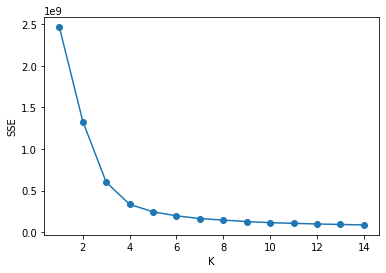

In [66]:
elbow(all_data)

kmeans clustering

In [96]:
kmeans = KMeans(n_clusters=5,init='random',n_init=10,max_iter=300)

In [97]:
kmeans.fit(all_data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)